# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
X.shape

(10, 1)

In [4]:
y.shape

(10,)

In [5]:
y = y.reshape(len(y),1)

In [6]:
y.shape

(10, 1)

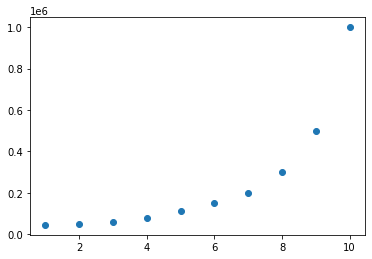

In [7]:
plt.scatter(X, y)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# UPPGIFT 1!!!
# Vi vill göra skalning både på X och y. Instantera därför två 
# separata objekt av StandardScalat, t.ex. sc_X och sc_y
# Vi har bara EN kolumn (X och EN i y )
# Skala om X och y
# visa dem i en plot

In [10]:
sc_X = StandardScaler()
sc_y = StandardScaler()


In [11]:
X = sc_X.fit_transform(X)
 
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)

In [12]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

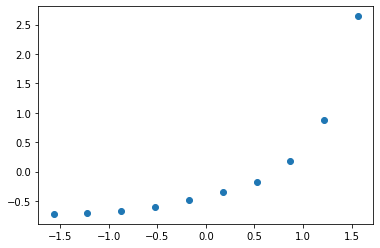

In [13]:
plt.scatter(X, y)
plt.show()

## Training the SVR model on the whole dataset

In [ ]:
# Dessa nya X och y skall användas i klassen SVR, som vi instantierar som en regression
# Ni måste Googla i scikit-learn på hur man importerar den
# ni ska också kolla i dokumentationen vilka parametrar som ska sättas
# Vi ska använda "kernel = 'rbf'"

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\users\erik\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [ ]:
#Hur ska vi använda regressor.predict för att modellera
# lön om erfarenheten är 6.5 ?

In [16]:
sc_X.transform([[6.5]])

array([[0.34815531]])

In [17]:
y_pred=regressor.predict([[0.34]])

In [19]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [18]:
y_pred

array([-0.28375604])

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

## Visualising the SVR results

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred.predict(y_pred), color= 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

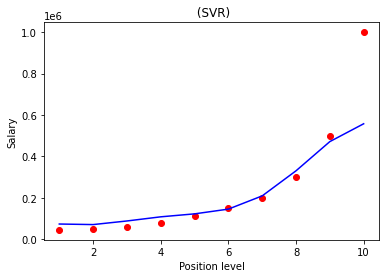

In [20]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title(' (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [21]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])